In [62]:
import numpy as np
from collections import Counter
from PQmodel import PQ,build_data
from seaborn import heatmap
import numpy as np
import matplotlib.pyplot as plt

In [63]:
from sklearn.decomposition import PCA

In [64]:
def myPCA(Xt,features=10): #Unicamente sirve para senales de 1D
    mean = np.mean(Xt,axis=1)
    n = len(Xt)
    Xm=np.array([mean[v]- Xt[v,:] for  v in range (n)])
    Cov = np.dot(Xm.T,Xm)/n-1
    Evalues,Evectors=np.linalg.eig(Cov)
    Epca = [list(Evalues).index(np.sort(Evalues,kind = "mergesort")[::-1][v]) for v in range(features)]
    Ppca = Evectors.T[Epca]
    Xpca = np.dot(Xm,Ppca.T)

    return Xpca,Ppca

In [66]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense,BatchNormalization,AveragePooling1D
from tensorflow.keras.models import Sequential

In [90]:
# Crear un modelo secuencial
model = Sequential()

# Agregar una capa de convolución 1D
model.add(Conv1D(filters = 256, kernel_size=16, activation='relu',input_shape=(20,1),padding='same'))
#model.add(Conv1D(filters = 512, kernel_size=16, activation='relu',input_shape=(64,1),padding='same'))

# Agregar una capa de pooling 1D
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# Agregar otra capa de convolución 1D y pooling
model.add(Conv1D(filters = 128, kernel_size=9, activation='relu',input_shape=(10,256),padding='same'))
model.add(MaxPooling1D(pool_size=2))

# Agregar otra capa de convolución 1D y pooling
#model.add(Conv1D(filters = 64, kernel_size=3, activation='relu',input_shape=(16,128),padding='same'))
#model.add(Conv1D(filters = 64, kernel_size=3, activation='relu',padding='same'))
#model.add(MaxPooling1D(pool_size=2))


model.add(Flatten())

# Agregar capas totalmente conectadas
model.add(Dense(units = 256, activation='relu'))
model.add(Dense(units = 29, activation='softmax'))  # 29 clases, activación softmax para clasificación multiclase

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 20, 256)           4352      
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 10, 256)          0         
 g1D)                                                            
                                                                 
 batch_normalization_9 (Batc  (None, 10, 256)          1024      
 hNormalization)                                                 
                                                                 
 conv1d_21 (Conv1D)          (None, 10, 128)           295040    
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 5, 128)           0         
 g1D)                                                            
                                                      

In [68]:
Prueba = PQ(Cicles=10,PeriodoDisturbio=10,InicioDisturbio=0,FS=3841)
datos = Prueba.PQaleatorio(10000)
datos.shape

(10000, 29, 640)

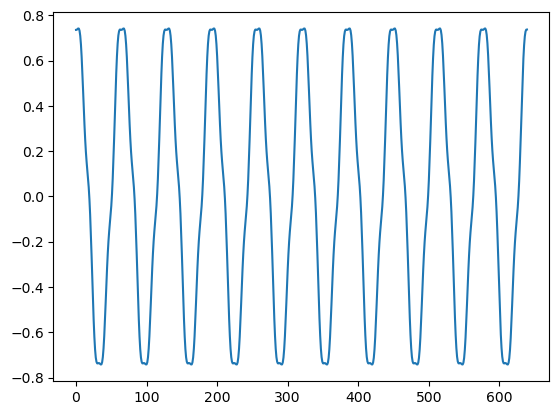

In [69]:
plt.plot(datos[0,7])
plt.show()

In [70]:
datos.shape

(10000, 29, 640)

In [71]:
dd,target=build_data(datos,cs=640)

In [72]:
target.shape
dd.shape

(290000, 640)

In [73]:
mnPCA = PCA(n_components=20)

In [94]:
mnPCA.fit(dd)

PCA(n_components=20)

In [95]:
Xtr = mnPCA.transform(dd)

In [96]:
Xtr.shape

(290000, 20)

In [97]:
Training = model.fit(Xtr,target,epochs=20,batch_size = 100)#,batch_size = 100

Epoch 1/20
2900/2900 [==============================] - 36s 12ms/step - loss: 1.0032 - accuracy: 0.5738
Epoch 2/20
2900/2900 [==============================] - 35s 12ms/step - loss: 0.6326 - accuracy: 0.6959
Epoch 3/20
2900/2900 [==============================] - 34s 12ms/step - loss: 0.5198 - accuracy: 0.7377
Epoch 4/20
2900/2900 [==============================] - 35s 12ms/step - loss: 0.4728 - accuracy: 0.7547
Epoch 5/20
2900/2900 [==============================] - 34s 12ms/step - loss: 0.4481 - accuracy: 0.7623
Epoch 6/20
2900/2900 [==============================] - 36s 13ms/step - loss: 0.4324 - accuracy: 0.7689
Epoch 7/20
2900/2900 [==============================] - 33s 11ms/step - loss: 0.4208 - accuracy: 0.7728
Epoch 8/20
2900/2900 [==============================] - 34s 12ms/step - loss: 0.4124 - accuracy: 0.7766
Epoch 9/20
2900/2900 [==============================] - 34s 12ms/step - loss: 0.4055 - accuracy: 0.7799
Epoch 10/20
2900/2900 [==============================] - 34s 12m

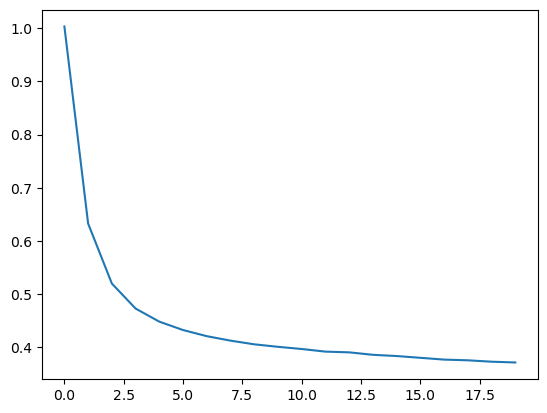

In [98]:
plt.plot(Training.history['loss'])
plt.show()

In [99]:
model.save("1C_PCA1.h5")